In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math

Much of this code is adapted from Jeanette Mumford's [tutorial](https://jeanettemumford.org/MixedModelSeries/v3-simulation-using-2-stage-random-effects.html)

In [2]:
n_subs = 16 # number of subjects
n_questions = 5 # number of questions per subject
true_sub_int = 250 # \beta_0 (slope) for subject
true_sub_slope = 10 #\beta_1 (intercept) for subject
G = np.array([[10**2, 0], # variance-covariance matrix for subject
              [0, 14**2]])

# generate random slopes and intercepts
beta_i = np.random.multivariate_normal([true_sub_int, true_sub_slope], G, n_subs)
sub_int = beta_i[:, 0]
sub_slope = beta_i[:, 1]

In [3]:
print("See how close the simualted values are to the true values:")
display(Math(f"\\beta_0 = {np.mean(sub_int).round(2)} \\newline \\beta_1 = {np.mean(sub_slope).round(2)}"))

See how close the simualted values are to the true values:


<IPython.core.display.Math object>

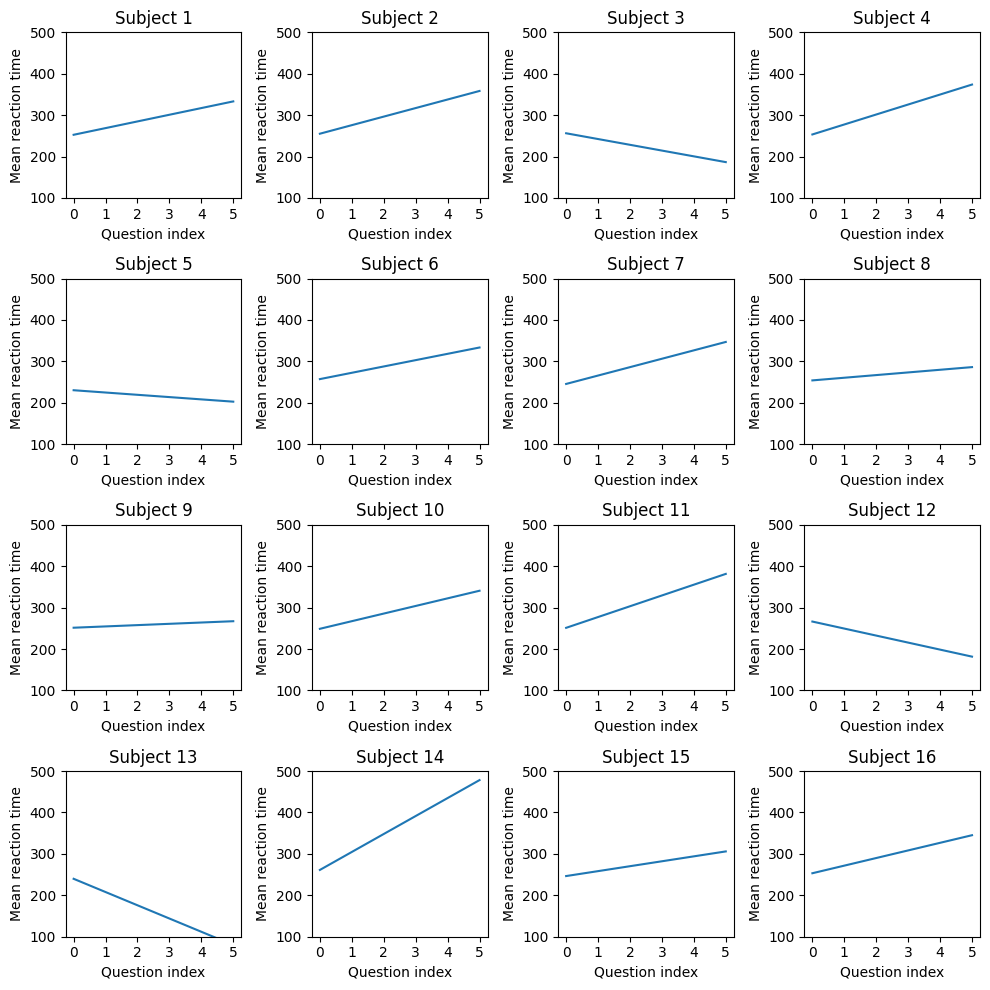

In [4]:
y = np.linspace(0, n_questions, n_questions)

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for a, sub in zip(ax.flatten(), np.arange(n_subs)): 
    a.plot(y, sub_int[sub] + sub_slope[sub]*y)
    a.set_xticks(np.arange(0, n_questions+1, 1))
    a.set_title(f"Subject {sub + 1}")
    a.set_xlabel('Question index')
    a.set_ylabel('Mean reaction time')
    a.set_ylim(100, 500) 

plt.tight_layout()

In [92]:
sigma = 50
residual = np.random.normal(0, sigma, (n_subs, n_questions))

In [93]:
rt = {}
for sub in np.arange(n_subs):
    rt[sub] = sub_int[sub] + sub_slope[sub]*y + residual[sub]

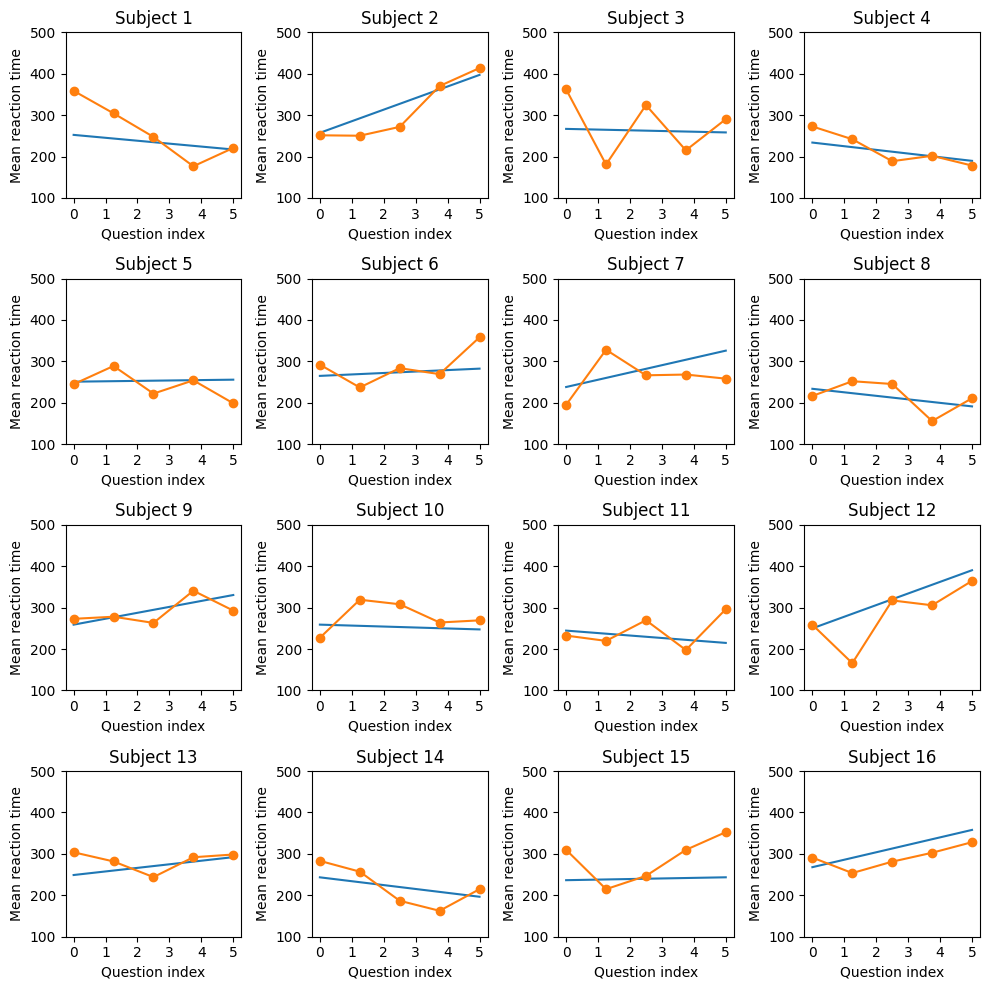

In [94]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for a, sub in zip(ax.flatten(), np.arange(n_subs)): 

    a.plot(y, sub_int[sub] + sub_slope[sub]*y)
    a.plot(y, rt[sub], marker='o')

    a.set_xticks(np.arange(0, n_questions+1, 1))
    a.set_title(f"Subject {sub + 1}")
    a.set_xlabel('Question index')
    a.set_ylabel('Mean reaction time')
    a.set_ylim(100, 500) 

plt.tight_layout()